#Name: Aniket Chattopadhyay
#Batch: NOV BATCH A14
#Field: DATA SCIENCE

##Task : Titanic Survival Prediction (Task 1)

Here we use the Titanic dataset to build a machine learning model that predicts whether a passenger on the Titanic survived or not.

> This is a classic beginner project with readily available data.

> The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket-class, fare, cabin, and whether or not they survived.



# Data preprocessing

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
df.shape

(418, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [23]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
df= df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500,S
414,1,1,female,39.0,0,0,108.9000,C
415,0,3,male,38.5,0,0,7.2500,S
416,0,3,male,NaN,0,0,8.0500,S


In [26]:
df.shape

(418, 8)

In [27]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [28]:
print(df['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [29]:
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.50000,0,0,7.8292,Q
1,1,3,female,47.00000,1,0,7.0000,S
2,0,2,male,62.00000,0,0,9.6875,Q
3,0,3,male,27.00000,0,0,8.6625,S
4,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,8.0500,S
414,1,1,female,39.00000,0,0,108.9000,C
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [31]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [32]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [34]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

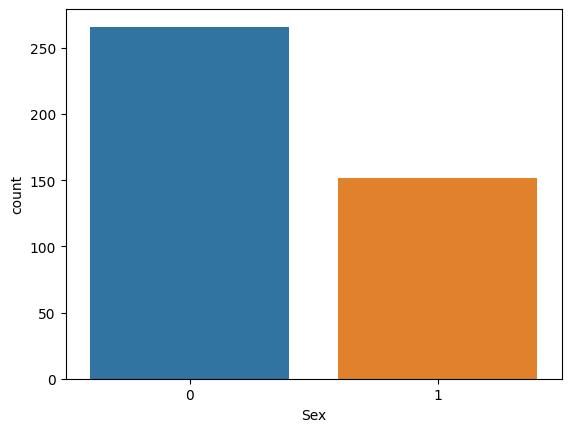

In [35]:
sns.countplot(x="Sex",data=df)

<ipython-input-43-8ac03f5a5bff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Fare", y="Age", ax=ax, data=df,ci=None)


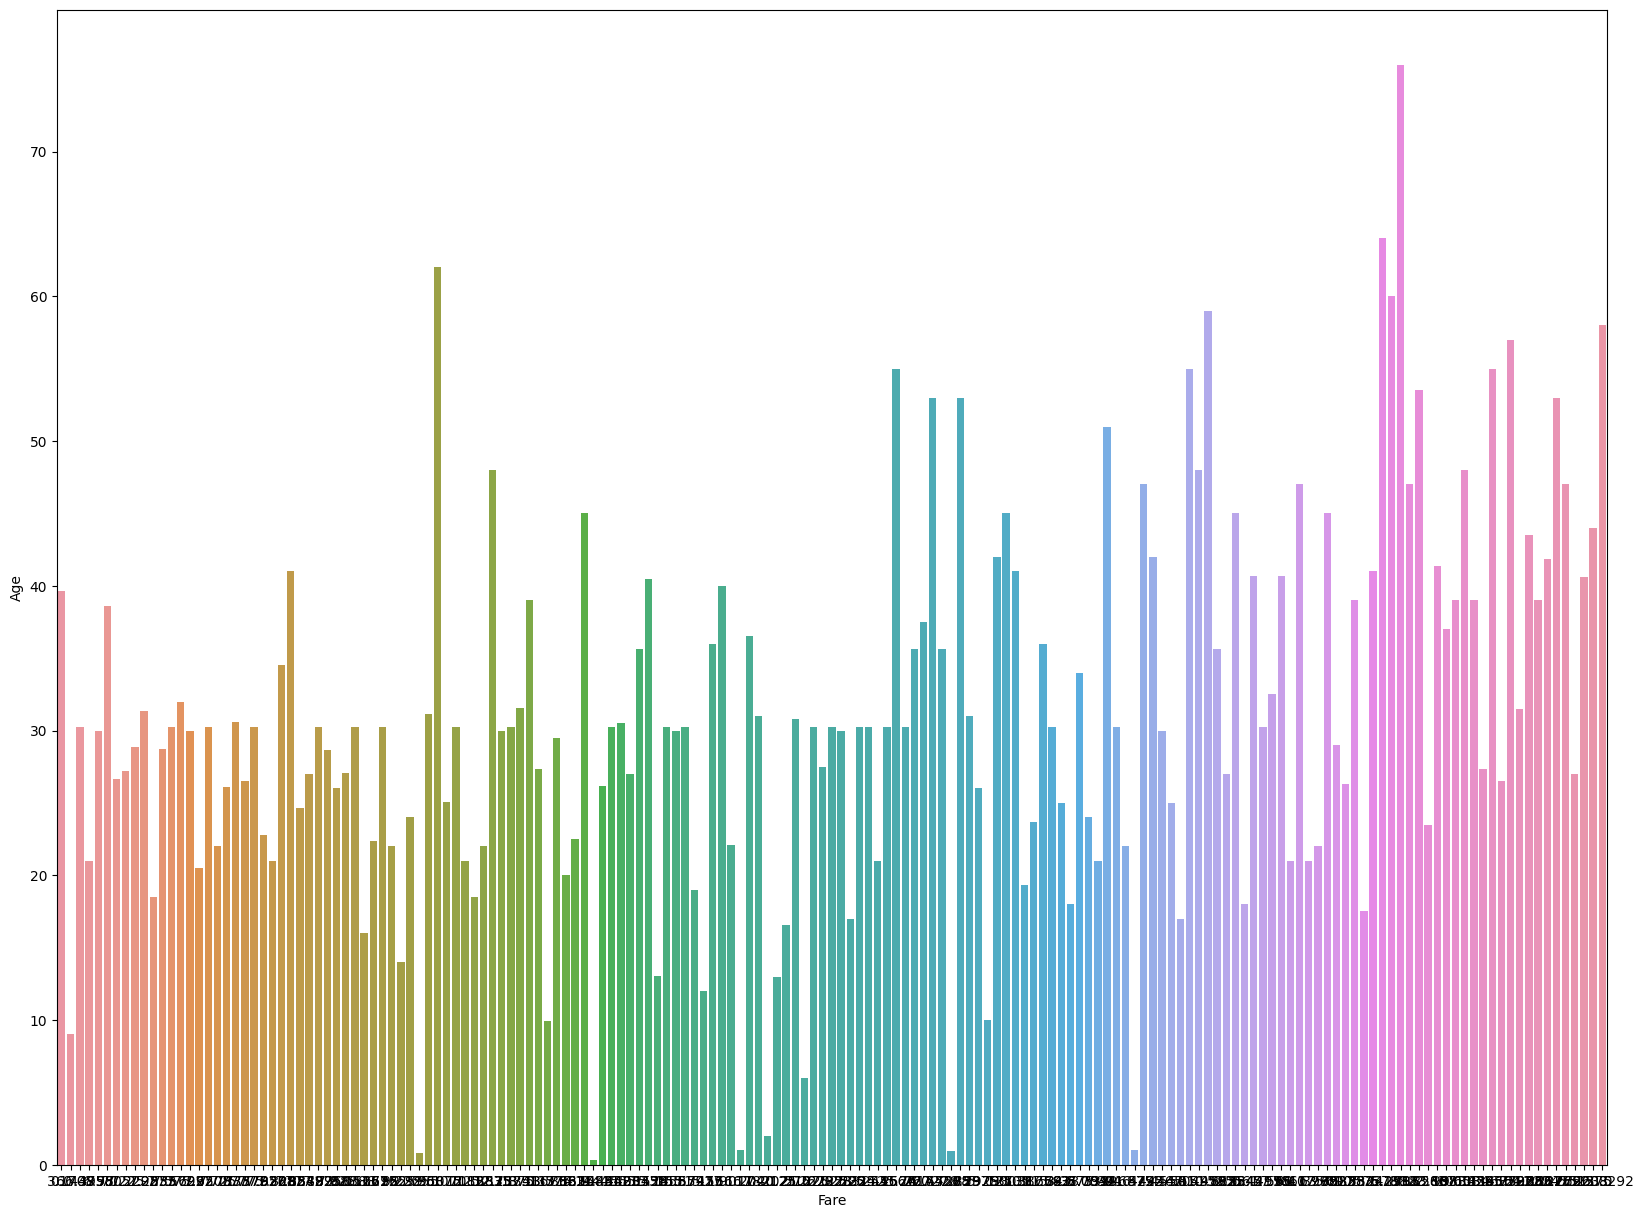

In [43]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.barplot(x="Fare", y="Age", ax=ax, data=df,ci=None)
plt.show()

# Splitting of data into training and testing data



In [44]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.50000,0,0,7.8292,2
1,1,3,1,47.00000,1,0,7.0000,0
2,0,2,0,62.00000,0,0,9.6875,2
3,0,3,0,27.00000,0,0,8.6625,0
4,1,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0


In [45]:
x=df.iloc[:,1:]
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [46]:
y=df.Survived
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((334, 7), (84, 7), (334,), (84,))

In [48]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
230,2,0,14.00000,0,0,65.0000,0
156,1,1,29.00000,0,0,221.7792,0
58,3,0,30.27259,1,0,16.1000,0
388,3,0,21.00000,0,0,7.7500,2
61,2,0,32.00000,0,0,13.5000,0
...,...,...,...,...,...,...,...
253,3,0,24.00000,0,0,9.3250,0
273,3,1,30.27259,1,0,15.5000,2
351,2,0,25.00000,0,0,10.5000,0
384,2,0,30.27259,0,0,12.8750,0


In [49]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
314,1,1,55.00000,0,0,135.6333,1
284,3,1,2.00000,1,1,20.2125,0
294,3,0,36.00000,0,0,9.5000,0
304,3,1,30.27259,0,0,7.7500,2
228,3,0,40.50000,0,0,15.1000,0
...,...,...,...,...,...,...,...
141,1,1,33.00000,0,0,151.5500,0
186,2,1,21.00000,0,1,21.0000,0
293,1,0,53.00000,1,1,81.8583,0
281,3,0,0.75000,1,1,13.7750,0


#Creating model

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [52]:
y_test

314    1
284    1
294    0
304    1
228    0
      ..
141    1
186    1
293    0
281    0
80     0
Name: Survived, Length: 84, dtype: int64

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [54]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,0,30.27259,0,0,8.0500,0
414,1,1,1,39.00000,0,0,108.9000,1
415,0,3,0,38.50000,0,0,7.2500,0
416,0,3,0,30.27259,0,0,8.0500,0
417,0,3,0,30.27259,1,1,22.3583,1


#Model conclusions

In [58]:
model.predict([[3,0,27.0,0,0,8.6625,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [59]:
model.predict([[1,1,39.0,0,0,108.90,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [55]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
accuracy_score(y_test,y_pred)

1.0

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        24

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

